## 前情函数

#### np.random.rand(d0, d1, d2...dn)
通过本函数可以返回一个或一组服从 0~1 均匀分布的随机样本值。随机样本取值范围是[0,1)，不包括1，[d0, d1,d2...dn]表示生成数据的维度

In [1]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pickle as p
import math
from time import time
import cv2

In [2]:
matrix = np.random.rand(5, 5)
print('matrix value:\n', matrix)

matrix value:
 [[0.78158819 0.4468711  0.46988561 0.54041034 0.62936808]
 [0.38545259 0.77640702 0.28374112 0.73323367 0.88914412]
 [0.29065348 0.73538156 0.21179341 0.22007978 0.91955227]
 [0.99769469 0.61212948 0.45331221 0.52345979 0.71789871]
 [0.59133094 0.66875222 0.3672258  0.63603345 0.88606763]]


通过图像容易发现这是一个产生均匀分布的随机数的函数

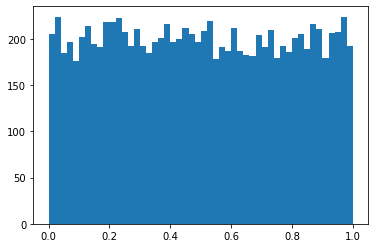

In [3]:
data = np.random.rand(10000)
plt.hist(data, bins=50)
plt.show()

#### tf.nn.conv2d() 函数  
tf.nn.conv2d(<br>
&ensp;&ensp;&ensp;&ensp;input,<br>
&ensp;&ensp;&ensp;&ensp;filter=None,<br>
&ensp;&ensp;&ensp;&ensp;strides=None,<br>
&ensp;&ensp;&ensp;&ensp;padding=None,<br>
&ensp;&ensp;&ensp;&ensp;use_cudnn_on_gpu=True,<br>
&ensp;&ensp;&ensp;&ensp;data_format='NHWC',<br>
&ensp;&ensp;&ensp;&ensp;dilations=[1, 1, 1, 1],<br>
&ensp;&ensp;&ensp;&ensp;name=None,<br>
&ensp;&ensp;&ensp;&ensp;filters=None<br>
)<br>
• input：需要做卷积的输入数据。注意：这是一个4维的张量（[batch, in_height, in_width, in_channels])，要求类型为 float32 或 float64 其中之一<br>
• filter：卷积核。[filter_height, filter_width, in_channels, out_channels]
• strides：图像每一维的步长，是一个一维向量，长度为4<br>
• padding：定义元素边框与元素内容之间的空间。"SAME" 或 "VALID"，这个值决定了不同的卷积方式。当为"SAME"时，表示边缘填充，适用于全尺寸作；当为"VALID"时，表示边缘不填充。<br>
• use_cudnn_on_gpu：bool类型，是否使用cudnn加速<br>
• name：该操作的名称<br>
• 返回值：返回一个tensor，即feature map<br>

In [4]:
matrix = np.random.rand(1, 5, 5, 1)
kernel = np.random.rand(3, 3, 1, 1)
input_data = tf.Variable(matrix, dtype=tf.float32)
filter_data = tf.Variable(kernel, dtype=tf.float32)

y_same = tf.nn.conv2d(input_data, filter_data, strides=[1, 1, 1, 1], use_cudnn_on_gpu=True, padding='SAME')
y_valid = tf.nn.conv2d(input_data, filter_data, strides=[1, 1, 1, 1], use_cudnn_on_gpu=True, padding='VALID')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    y_1 = sess.run(y_same)
    y_2 = sess.run(y_valid)
    y_3 = sess.run(input_data)

print('The input data:\n', y_3,
      '\nThe input data shape:\n', y_3.shape,
      '\nThe \'SAME\' conv:\n', y_1,
      '\nThe \'SAME\' shape:\n', y_1.shape,
      '\nThe \'VALID\' conv:\n', y_2,
      '\nThe \'VALID\' shape:\n', y_2.shape,)

The input data:
 [[[[0.83288574]
   [0.7839328 ]
   [0.78448915]
   [0.27689502]
   [0.69270074]]

  [[0.1779074 ]
   [0.06221103]
   [0.80587375]
   [0.79026604]
   [0.7586798 ]]

  [[0.404163  ]
   [0.3389252 ]
   [0.80162454]
   [0.7276099 ]
   [0.04177679]]

  [[0.32564884]
   [0.70365876]
   [0.4756321 ]
   [0.5159088 ]
   [0.22641866]]

  [[0.42596477]
   [0.9774817 ]
   [0.6001973 ]
   [0.83533174]
   [0.28074622]]]] 
The input data shape:
 (1, 5, 5, 1) 
The 'SAME' conv:
 [[[[0.64746857]
   [1.5796132 ]
   [2.012709  ]
   [2.2981427 ]
   [1.5702264 ]]

  [[2.0084417 ]
   [2.713911  ]
   [2.7838511 ]
   [2.7585385 ]
   [1.6316812 ]]

  [[1.2610247 ]
   [2.3821883 ]
   [3.1639755 ]
   [2.8346455 ]
   [1.3397884 ]]

  [[1.9888229 ]
   [3.0812583 ]
   [3.632366  ]
   [2.2990842 ]
   [1.1451306 ]]

  [[1.1747122 ]
   [1.5842456 ]
   [1.5154519 ]
   [1.1904594 ]
   [0.5789158 ]]]] 
The 'SAME' shape:
 (1, 5, 5, 1) 
The 'VALID' conv:
 [[[[2.713911 ]
   [2.7838511]
   [2.7585385]]

  [[2

#### tf.nn.max_pool() 函数  
tf.nn.max_pool(<br>
&ensp;&ensp;&ensp;&ensp;value,<br>
&ensp;&ensp;&ensp;&ensp;ksize,<br>
&ensp;&ensp;&ensp;&ensp;strides,<br>
&ensp;&ensp;&ensp;&ensp;padding,<br>
&ensp;&ensp;&ensp;&ensp;data_format='NHWC',<br>
&ensp;&ensp;&ensp;&ensp;name=None,<br>
&ensp;&ensp;&ensp;&ensp;input=None<br>
)<br>
#### tf.nn.avg_pool() 函数  
tf.nn.avg_pool(<br>
&ensp;&ensp;&ensp;&ensp;value,<br>
&ensp;&ensp;&ensp;&ensp;ksize,<br>
&ensp;&ensp;&ensp;&ensp;strides,<br>
&ensp;&ensp;&ensp;&ensp;padding,<br>
&ensp;&ensp;&ensp;&ensp;data_format='NHWC',<br>
&ensp;&ensp;&ensp;&ensp;name=None,<br>
&ensp;&ensp;&ensp;&ensp;input=None<br>
)<br>
• value：需要池化的输入。一般池化层接在卷积层后面，所以输入通常是conv2d，所输出的 feature map，依然是4维的张量（[batch, height, width, channels]）<br>
• ksize：池化窗口的大小，由于一般不在 batch 和 channel 上做池化，所以 ksize 一般是 [1,height, width,1]<br>
• strides：图像每一维的步长，是一个一维向量，长度为4<br>
• padding：和卷积函数中padding含义一样<br>
• data_format：一个字符串。支持 NHWC 和 NCHW
• name：该操作的名称<br>
• 返回值：返回一个tensor<br>
<br>
下面仅以 tf.nn.max_pool() 函数函数为例

In [5]:
matrix = np.random.rand(1, 5, 5, 1)
kernel = np.random.rand(3, 3, 1, 1)
input_data = tf.Variable(matrix, dtype=tf.float32)
filter_data = tf.Variable(kernel, dtype=tf.float32)

y = tf.nn.conv2d(input_data, filter_data, strides=[1, 1, 1, 1], use_cudnn_on_gpu=True, padding='SAME')
output_same = tf.nn.max_pool(value=y, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
output_valid = tf.nn.max_pool(value=y, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    y0 = sess.run(y)
    y1 = sess.run(output_same)
    y2 = sess.run(output_valid)
    
print('y shape:', y0.shape,
      '\noutput_same value:\n', y1,
      '\noutput_same shape:', y1.shape,
      '\noutput_valid value:\n', y2,
      '\noutput_valid shape:', y2.shape,)

y shape: (1, 5, 5, 1) 
output_same value:
 [[[[1.5538048 ]
   [1.5930182 ]
   [0.6173942 ]]

  [[1.8491311 ]
   [2.1718354 ]
   [1.7262425 ]]

  [[0.98157835]
   [1.1464852 ]
   [1.2454841 ]]]] 
output_same shape: (1, 3, 3, 1) 
output_valid value:
 [[[[1.5538048]
   [1.5930182]]

  [[1.8491311]
   [2.1718354]]]] 
output_valid shape: (1, 2, 2, 1)


## 二维卷积示例

#### 定义卷积核

In [6]:
kernel_1 = np.array(
            [[-1, 0, 1],
            [-2, 0, 2],
            [-1, 0, 1]])

kernel_2 = np.array(
            [[-1, -2, -1],
            [0, 0, 0],
            [1, 2, 1]])

kernel_3 = np.array(
            [[1, 1, 1],
            [1, -15, 1],
            [1, 1, 1]])

#### 定义卷积函数

In [7]:
def Conv(image, kernel):
    img_width, img_height = image.shape
    k_dim1, k_dim2 = kernel.shape
    
    AddW = int((k_dim1-1) / 2)
    AddH = int((k_dim2-1) / 2)

    image = np.row_stack((np.zeros([1, image.shape[1]]), image, np.zeros([1, image.shape[1]])))
    image = np.column_stack((np.zeros([image.shape[0], 1]), image, np.zeros([image.shape[0], 1])))
    
    output = np.zeros_like(image)
    
    for i in range(AddW, AddW + img_width):
        for j in range(AddH, AddH + img_height):
            output[i][j] = int(np.sum(image[i - AddW:i + AddW + 1,
                                          j - AddW:j + AddW + 1] * kernel))
    
    return output[AddW:AddW + img_width, AddH:AddH + img_height]

#### 图像卷积

In [8]:
image_row = cv2.cvtColor(cv2.imread('./data/demo.jpg'), cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image_row, cv2.COLOR_BGR2GRAY)

sobel_x = Conv(image, kernel_1)
sobel_y = Conv(image, kernel_2)
laplace = Conv(image, kernel_3)

#### 可视化

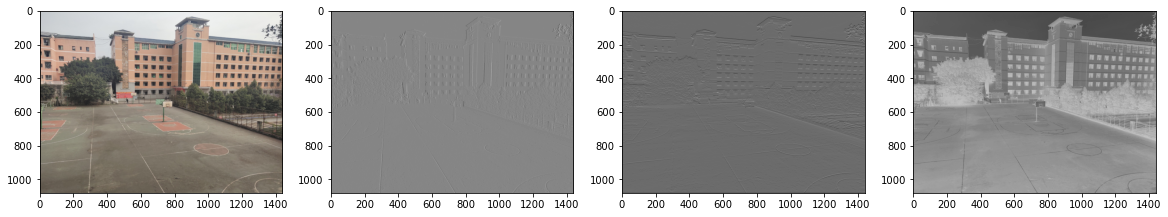

In [9]:
pic = [image_row, sobel_x, sobel_y, laplace]
fig = plt.gcf()
fig.set_size_inches(20, 20)
for i in range(len(pic)):
    ax_img = plt.subplot(1, 4, i + 1)
    plt_img = pic[i]
    if i == 0:
        ax_img.imshow(plt_img)
    else:
        ax_img.imshow(plt_img, cmap='gray')
plt.show()

### pickle 模块简单的数据读入  
pickle模块只能在Python中使用，python中几乎所有的数据类型（列表，字典，集合，类等）都可以用pickle来序列化，pickle序列化后的数据，可读性差，人一般无法识别，pickle 只能读取由 pickle 写入的数据，如下所示的字符串`I am Iron Man!`在pickle写入的文件内容为`€X   I am Iron Man!q .`

In [10]:
file_data = 'I am Iron Man!'

print(file_data)
with open('./data/demo.txt', 'wb', 0) as f:
    p.dump(file_data,f)

print('*******line*******')

with open('./data/demo.txt', 'rb', 0) as f:
    data = p.load(f)
print(data)

I am Iron Man!
*******line*******
I am Iron Man!


### numpy.concatenate()函数  
numpy.concatenate((a1，a2，...), axis = 0, out = None)
numpy提供了numpy.concatenate((a1,a2,...), axis=0)函数。能够一次完成多个数组的拼接。其中a1,a2,...是数组类型的参数<br>
参量：<br>
a1，a2，…： array_like 序列<br>
&ensp;&ensp;&ensp;&ensp;数组必须具有相同的形状，除了对应轴的尺寸（默认为第一个）<br>
axis：int，可选<br>
&ensp;&ensp;&ensp;&ensp;阵列将沿其连接的轴。如果axis为None，则在使用前将数组展平。默认值为 0，其值代表了沿着什么维度连接<br>
out：ndarray，可选<br>
&ensp;&ensp;&ensp;&ensp;如果提供，则为放置结果的参数。形状必须正确，并且与未指定out参数的串联连接的形状匹配<br>
返回值：ndarray<br>
&ensp;&ensp;&ensp;&ensp;串联后的值<br>

In [11]:
a=np.array([1,2,3])
b=np.array([11,22,33])
c=np.array([44,55,66])
result = np.concatenate((a,b,c),axis=0)
result

array([ 1,  2,  3, 11, 22, 33, 44, 55, 66])

行拼接

In [12]:
a=np.array([[1,2,3],[4,5,6]])
b=np.array([[11,21,31],[7,8,9]])
result = np.concatenate((a,b),axis=0)
result

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [11, 21, 31],
       [ 7,  8,  9]])

列拼接

In [13]:
a=np.array([[1,2,3],[4,5,6]])
b=np.array([[11,21,31],[7,8,9]])
result = np.concatenate((a,b),axis=1)
result

array([[ 1,  2,  3, 11, 21, 31],
       [ 4,  5,  6,  7,  8,  9]])

### numpy.transpose()函数
numpy.transpose(a，axes = None)<br>
反转或排列数组的轴；返回修改后的数组
参量：<br>
a： array_like 序列<br>
axes：输入元组，用于反转的轴<br>
返回 array_like 值<br>
简单来说，对于矩阵就是转置，对于一般输入数据，根据元组值进行位置调整<br>
**矩阵**

In [14]:
x = np.arange(4).reshape((2,2))
print('x:\n', x)
print('x transpose:\n', x.transpose())

x:
 [[0 1]
 [2 3]]
x transpose:
 [[0 2]
 [1 3]]


**多维数组**<br>
解析一下这个 cell，x=np.ones(1, 2, 3) 代表维度为 1x2x3，其中可假设映射关系为 1-axis0，2-axis1，3-axis2，那么通过 transpose(1, 0, 2)，就意味着 transpose(axis1, axis0, axis2)，映射回去就有 x_transpose 维度为 2x1x3

In [15]:
x = np.ones((1, 2, 3))
print('x:\n', x)
print('x shape:\n', x.shape)
x_transpose = x.transpose(1, 0, 2)
print('x transpose:\n', x_transpose)
print('x transpose shape:\n', x_transpose.shape)

x:
 [[[1. 1. 1.]
  [1. 1. 1.]]]
x shape:
 (1, 2, 3)
x transpose:
 [[[1. 1. 1.]]

 [[1. 1. 1.]]]
x transpose shape:
 (2, 1, 3)


对下同样有映射关系 10000-axis0，3-axis1，32-axis2，32-axis3，transpose(0, 2, 3, 1)意味着transpose(axis0, axis2, axis3, axis1)，可得 x_transpose 维度为 10000x32x32x3

In [16]:
x = np.ones((10000, 3, 32, 32))
print('x shape:\n', x.shape)
x_transpose = x.transpose(0, 2, 3, 1)
print('x transpose shape:\n', x_transpose.shape)

x shape:
 (10000, 3, 32, 32)
x transpose shape:
 (10000, 32, 32, 3)


### sklearn.preprocessing 的 OneHotEncoder
OneHotEncoder 用于进行独热编码

In [17]:
a = np.array([[1], [2], [3], [4], [5]])

In [18]:
one_hot = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]

In [19]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(one_hot)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [20]:
encoder.transform(a)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

## 正式开始

### 下载数据
解压数据分布如下所示<br>
batches.meta<br>
data_batch_1<br>
data_batch_2<br>
data_batch_3<br>
data_batch_4<br>
data_batch_5<br>
test_batch

In [21]:
import urllib.request
import os
import tarfile

url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
filepath = './data/cifar-10-python.tar.gz'
if not os.path.exists('./data'):
    os.makedirs('./data')
if not os.path.isfile(filepath):
    result = urllib.request.urlretrieve(url, filepath)
    print('downloaded:', result)
else:
    print('Data file already exists.')

if not os.path.exists('./data/cifar-10-batches-py'):
    tfile = tarfile.open('./data/cifar-10-python.tar.gz', 'r:gz')
    result = tfile.extractall('./data/')
    print('Extracted to .cifar-10-batches-py/')
else:
    print('Directory already exists.')

Data file already exists.
Directory already exists.


#### 定义加载每个 batch 的函数

In [22]:
def load_CIFAR_batch(filename):
    with open(filename, 'rb') as f:
        data_dict = p.load(f, encoding='bytes')
        images = data_dict[b'data']
        labels = data_dict[b'labels']

        images = images.reshape(10000, 3, 32, 32)
        images = images.transpose(0, 2, 3, 1)
        labels = np.array(labels)

        return images, labels

#### 定义数据加载函数，连接整个 batch  
del 语句可以减少内存占用，提高执行效率，取消没有太大的影响

In [23]:
def load_CIFAR_data(data_dir):
    images_train = []
    labels_train = []
    for i in range(5):
        f = os.path.join(data_dir, 'data_batch_%d' % (i + 1))
        print('loading', f)
        image_batch, label_batch = load_CIFAR_batch(f)
        images_train.append(image_batch)
        labels_train.append(label_batch)
        print('train images nums:', len(images_train))
        Xtrain = np.concatenate(images_train)
        Ytrain = np.concatenate(labels_train)
        
        # del image_batch, label_batch

    Xtest, Ytest = load_CIFAR_batch(os.path.join(data_dir, 'test_batch'))
    print('finished loadding CIFAR-10 data')

    return Xtrain, Ytrain, Xtest, Ytest

### 读取数据，查看数据信息

In [24]:
data_dir = 'data/cifar-10-batches-py'
Xtrain, Ytrain, Xtest, Ytest = load_CIFAR_data(data_dir)

loading data/cifar-10-batches-py\data_batch_1
train images nums: 1
loading data/cifar-10-batches-py\data_batch_2
train images nums: 2
loading data/cifar-10-batches-py\data_batch_3
train images nums: 3
loading data/cifar-10-batches-py\data_batch_4
train images nums: 4
loading data/cifar-10-batches-py\data_batch_5
train images nums: 5
finished loadding CIFAR-10 data


In [25]:
print('training data shape:', Xtrain.shape)
print('training labels shape:', Ytrain.shape)
print('test data shape:', Xtest.shape)
print('test labels shape:', Ytest.shape)

training data shape: (50000, 32, 32, 3)
training labels shape: (50000,)
test data shape: (10000, 32, 32, 3)
test labels shape: (10000,)


### 定义图像可视化函数

In [26]:
label_dict = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer",
              5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}


def plot_images_labels(images, labels, num):
    total = len(images)
    fig = plt.gcf()
    fig.set_size_inches(15, math.ceil(num / 10) * 7)
    for i in range(0, num):
        choose_n = np.random.randint(0, total)
        ax = plt.subplot(math.ceil(num / 5), 5, 1 + i)
        ax.imshow(images[choose_n], cmap='binary')

        title = str(i) + ',' + label_dict[labels[choose_n]]
        ax.set_title(title, fontsize=10)
    plt.show()

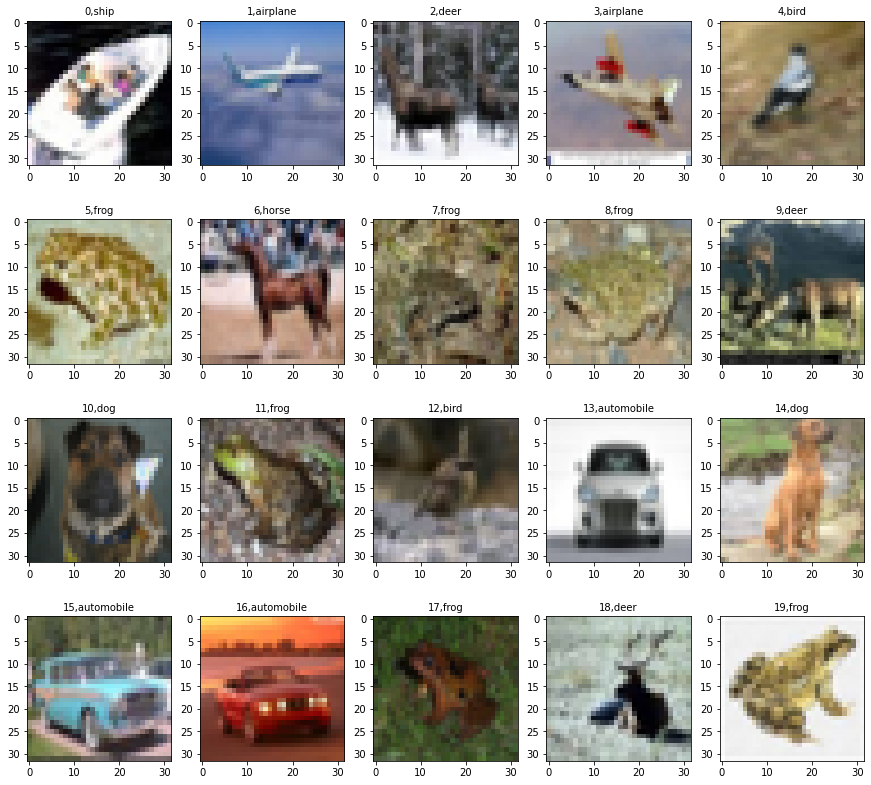

In [27]:
plot_images_labels(Xtrain, Ytrain, 20)

### 数据预处理

In [28]:
Xtrain_normalize = Xtrain.astype('float32') / 255.0
Xtest_normalize = Xtest.astype('float32') / 255.0

In [29]:
encoder = OneHotEncoder(sparse=False)

one_hot = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]
encoder.fit(one_hot)
Ytrain_reshape = Ytrain.reshape(-1, 1)
Ytrain_onehot = encoder.transform(Ytrain_reshape)
Ytest_reshape = Ytest.reshape(-1, 1)
Ytest_onehot = encoder.transform(Ytest_reshape)

In [30]:
Ytrain_reshape.shape

(50000, 1)

In [31]:
one_hot = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]

In [32]:
encoder.fit(one_hot)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [33]:
Ytrain_reshape[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]])

In [34]:
encoder.transform(Ytrain_reshape[:6])

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

### 定义网络结构

In [35]:
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1), name='W')


def bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape), name='b')


def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')


def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [36]:
with tf.name_scope('input_layer'):
    x = tf.placeholder('float32', shape=[None, 32, 32, 3], name='x')

    
with tf.name_scope('conv_1'):
    # k_width, k_height, input_chn, output_chn
    W1 = weight([3, 3, 3, 32])
    b1 = bias([32])
    conv_1 = conv2d(x, W1) + b1
    conv_1 = tf.nn.relu(conv_1)


with tf.name_scope('pool_1'):
    pool_1 = max_pool_2x2(conv_1)


with tf.name_scope('conv_2'):
    W2 = weight([3, 3, 32, 64])
    b2 = bias([64])
    conv_2 = conv2d(pool_1, W2) + b2
    conv_2 = tf.nn.relu(conv_2)


with tf.name_scope('pool_2'):
    pool_2 = max_pool_2x2(conv_2)


with tf.name_scope('fcn'):
    W3 = weight([4096, 128])
    b3 = bias([128])
    flat = tf.reshape(pool_2, [-1, 4096])
    h = tf.nn.relu(tf.matmul(flat, W3) + b3)
    h_dropout = tf.nn.dropout(h, rate=0.2)


with tf.name_scope('output_layer'):
    W4 = weight([128, 10])
    b4 = bias([10])
    forward = tf.matmul(h_dropout, W4) + b4
    pred = tf.nn.softmax(forward)

### 定义优化器

In [37]:
with tf.name_scope('optimizer'):
    y = tf.placeholder('float32', shape=[None, 10], name='label')
    loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=forward, labels=y))
    optimizer = tf.train.AdamOptimizer(
        learning_rate=0.0001).minimize(loss_function)

### 定义准确率

In [38]:
with tf.name_scope('evalution'):
    correct_prediction = tf.equal(tf.argmax(pred, 1),
                   tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,'float32'))

### 定义训练参数

In [39]:
train_epochs = 100
batch_size = 20
total_batch = int(len(Xtrain)/batch_size)
epoch_list = []
accuracy_list = []
loss_list = []

epoch = tf.Variable(0, name='epoch', trainable=False)

startTime = time()

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [40]:
ckpt_dir = './CIFAR10_ckpt/'
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

log_dir = './CIFAR10_log/'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

saver = tf.train.Saver(max_to_keep = 5)
writer = tf.summary.FileWriter(log_dir, sess.graph)

image_shape_input = tf.reshape(x, [-1, 32, 32, 1])
tf.summary.image('input', image_shape_input, 9)
tf.summary.histogram('forward', forward)
tf.summary.scalar('loss', loss_function)
tf.summary.scalar('accuracy', accuracy)
merged_summary_op = tf.summary.merge_all()

ckpt = tf.train.latest_checkpoint(ckpt_dir)
if ckpt != None:
    saver.restore(sess, ckpt)
else:
    print("Training from scratch.")

start = sess.run(epoch)
print("Training starts from {} epoch.".format(start + 1))

Training from scratch.
Training starts from 1 epoch.


### 开始训练

In [41]:
def get_train_batch(number, batch_size):
    return Xtrain_normalize[number*batch_size:(number+1)*batch_size],\
              Ytrain_onehot[number*batch_size:(number+1)*batch_size]

for ep in range(start, train_epochs):
    for i in range(total_batch):
        batch_x, batch_y = get_train_batch(i,batch_size)
        sess.run(optimizer, feed_dict={x:batch_x,y:batch_y})
    if i % 100 == 0:
        print("Step {}".format(i), "finished")
  
    summary_str, loss, acc = sess.run([merged_summary_op, loss_function, accuracy],feed_dict={x:batch_x, y:batch_y})
    writer.add_summary(summary_str, ep)
    epoch_list.append(ep+1)
    loss_list.append(loss)
    accuracy_list.append(acc)

    print("Train epoch:", '%02d' % (sess.run(epoch) + 1),
        "Loss=", "{:.6f}".format(loss), "Accuracy=", acc)
  
    saver.save(sess, ckpt_dir + "CIFAR10_cnn_model.ckpt", global_step=ep+1)
    sess.run(epoch.assign(ep + 1))

duration = time() - startTime
print("Train finished takes:", duration)

Train epoch: 01 Loss= 2.054766 Accuracy= 0.2
Train epoch: 02 Loss= 1.909668 Accuracy= 0.35
Train epoch: 03 Loss= 1.921870 Accuracy= 0.25
Train epoch: 04 Loss= 1.646637 Accuracy= 0.25
Train epoch: 05 Loss= 1.632068 Accuracy= 0.4
Train epoch: 06 Loss= 1.504208 Accuracy= 0.4
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Train epoch: 07 Loss= 1.571769 Accuracy= 0.35
Train epoch: 08 Loss= 1.325274 Accuracy= 0.55
Train epoch: 09 Loss= 1.250108 Accuracy= 0.55
Train epoch: 10 Loss= 1.214084 Accuracy= 0.65
Train epoch: 11 Loss= 1.214848 Accuracy= 0.55
Train epoch: 12 Loss= 1.262779 Accuracy= 0.5
Train epoch: 13 Loss= 1.136217 Accuracy= 0.6
Train epoch: 14 Loss= 1.000617 Accuracy= 0.7
Train epoch: 15 Loss= 1.063693 Accuracy= 0.7
Train epoch: 16 Loss= 1.073808 Accuracy= 0.6
Train epoch: 17 Loss= 0.966780 Accuracy= 0.75
Train epoch: 18 Loss= 0.948063 Accuracy= 0.7
Train epoch: 19 Loss= 0.943409 Accuracy= 0.7
Train epoch: 20 Loss= 0.901108 Accuracy= 0.75
Train 

### 训练可视化

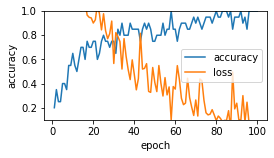

In [42]:
plt.plot(epoch_list, accuracy_list, label='accuracy')
plt.plot(epoch_list, loss_list, label='loss')
fig = plt.gcf()
fig.set_size_inches(4, 2)
plt.ylim(0.1, 1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

### 模型测试

In [43]:
test_total_batch = int(len(Xtest_normalize) / batch_size)
test_acc_sum = 0.0
for i in range(test_total_batch):
    test_image_batch = Xtest_normalize[i*batch_size:(i+1)*batch_size]
    test_label_batch = Ytest_onehot[i*batch_size:(i+1)*batch_size]
    test_batch_acc = sess.run(accuracy, feed_dict={x:test_image_batch,y:test_label_batch})
    test_acc_sum += test_batch_acc
test_acc = float(test_acc_sum / test_total_batch)
print("Test accuracy:{:.6f}".format(test_acc))

Test accuracy:0.670200


### 预测可视化

In [44]:
def plot_images_prediction_labels(images, labels, num):
    total = len(images)
    fig = plt.gcf()
    fig.set_size_inches(15, math.ceil(num / 10) * 7)
    for i in range(0, num):
        choose_n = np.random.randint(0, total)
        ax = plt.subplot(math.ceil(num / 5), 5, 1 + i)
        ax.imshow(images[choose_n], cmap='binary')
        test_pred = sess.run(pred, feed_dict={x:(Xtest.astype('float32') / 255.0)[choose_n:choose_n + 1]})
        title = 'label:' + label_dict[labels[choose_n]] + \
                ' pred:' + label_dict[np.argmax(test_pred, 1)[0]]
        ax.set_title(title, fontsize=10)
    plt.show()

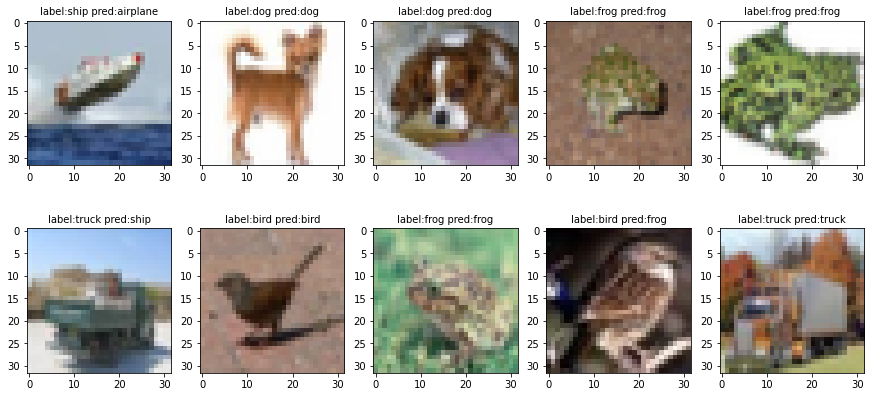

In [45]:
plot_images_prediction_labels(Xtest, Ytest, 10)